<a href="https://colab.research.google.com/github/Divyaangel/PytorchUnderstanding/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#convert msnist image to tensor of 4d

transform = transforms.ToTensor()

In [4]:
#train daata
train_data = datasets.MNIST(root='/cnn_data', train = True, download = True, transform = transform )

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data=datasets.MNIST(root='/cnn_data', train = False, download = True, transform = transform )

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:

# create a small batch ...10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [16]:
#define cnn model
#descrive 2 convolutionla layer
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [17]:
# garb 1 mnist image

for i, (X_Train, y_train ) in enumerate(train_data):
  break

In [18]:
X_Train.shape

torch.Size([1, 28, 28])

In [19]:
x = X_Train.view(1, 1, 28, 28)


In [21]:
#first convolution

x =F.relu(conv1(x))

In [22]:
x.shape

torch.Size([1, 6, 26, 26])

In [23]:
# pooling layer
x = F.max_pool2d(x, 2, 2)

In [24]:
x.shape

torch.Size([1, 6, 13, 13])

In [25]:
#2nd convolutiion
x = F.relu(conv2(x))

In [26]:
x.shape

torch.Size([1, 16, 11, 11])

In [27]:
#pooling
x = F.max_pool2d(x, 2, 2)

In [28]:
x.shape

torch.Size([1, 16, 5, 5])

In [29]:
#model class

class ConvolutionalNetwork (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    #fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)

    #second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    #re-view to flatten in out

    X = X.view(-1, 16*5*5)

    #fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim =1)


In [30]:
#create an instance

torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
#loss function optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [40]:
import time
start_time = time.time()

#create variable to tack things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


#for loops of epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Train
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train)  # Pass a batch of data to the model
        loss = criterion(y_pred, y_train)


        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

    #update

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    #print result
        if b % 600 == 0:
          print(f'Epoch : {i} Batch : {b} Loss : {loss.item()}')

        train_losses.append(loss)
        train_correct.append(trn_corr)

  #test
    with torch.no_grad():
      for b, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)








current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')


Epoch : 0 Batch : 600 Loss : 0.1799113005399704
Epoch : 0 Batch : 1200 Loss : 0.2360541820526123
Epoch : 0 Batch : 1800 Loss : 0.016516011208295822
Epoch : 0 Batch : 2400 Loss : 0.11891243606805801
Epoch : 0 Batch : 3000 Loss : 0.09155439585447311
Epoch : 0 Batch : 3600 Loss : 0.01931670866906643
Epoch : 0 Batch : 4200 Loss : 0.029946219176054
Epoch : 0 Batch : 4800 Loss : 0.07224021852016449
Epoch : 0 Batch : 5400 Loss : 0.02951863966882229
Epoch : 0 Batch : 6000 Loss : 0.010667102411389351
Epoch : 1 Batch : 600 Loss : 0.004821421578526497
Epoch : 1 Batch : 1200 Loss : 0.03222741559147835
Epoch : 1 Batch : 1800 Loss : 0.008685048669576645
Epoch : 1 Batch : 2400 Loss : 0.35324811935424805
Epoch : 1 Batch : 3000 Loss : 0.0032359883189201355
Epoch : 1 Batch : 3600 Loss : 0.0015662291552871466
Epoch : 1 Batch : 4200 Loss : 0.0012184312799945474
Epoch : 1 Batch : 4800 Loss : 0.1271047294139862
Epoch : 1 Batch : 5400 Loss : 0.00048432761104777455
Epoch : 1 Batch : 6000 Loss : 0.041201844811

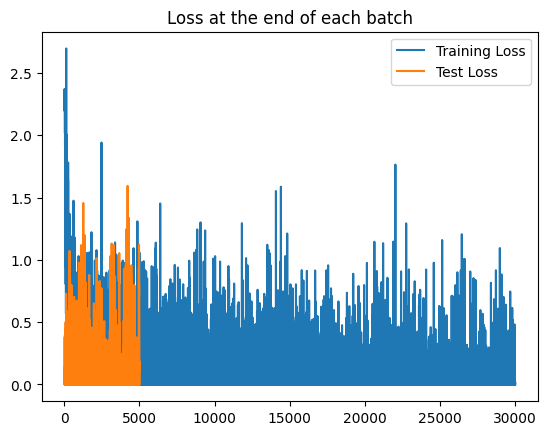

In [42]:
#graph the loss
train_losses = [t.item() for t in train_losses]
test_losses = [t.item() for t in test_losses]
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.title('Loss at the end of each batch')
plt.legend()


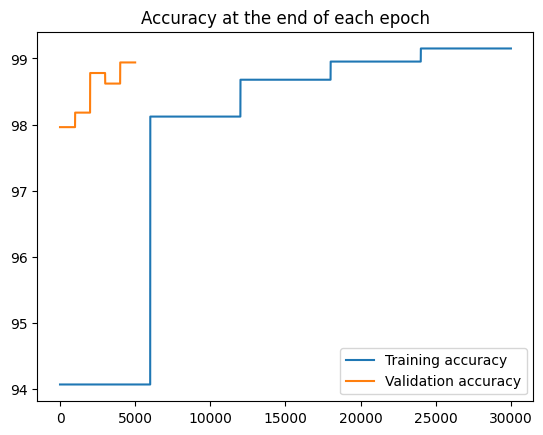

In [43]:
#graph the accuracy
plt.plot([t/600 for t in train_correct], label = "Training accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [44]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [45]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

  print(f'Test accuracy: {correct/10000}')

Test accuracy: 0.9894000291824341


In [46]:
# grab an image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [47]:
#just data
test_data[4143][0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [48]:
#reshape it
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

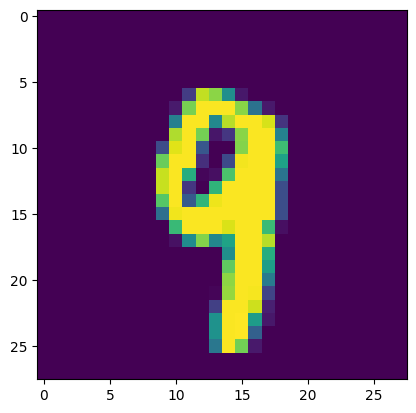

In [49]:
# show image
plt.imshow(test_data[4143][0].reshape(28, 28))

In [50]:
# pass image through model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view( 1, 1, 28, 28))


In [51]:
#check the new prediction....get probabilities
new_prediction

tensor([[-2.4599e+01, -1.9478e+01, -2.0346e+01, -1.9237e+01, -1.0330e+01,
         -2.3240e+01, -3.2472e+01, -1.4231e+01, -1.9896e+01, -3.3378e-05]])

In [52]:
new_prediction.argmax()

tensor(9)